# "Анализ столбцов с множественными значениями"

В распоряжении имеются данные из открытого источника(Kaggle.com) о фильмах и телешоу, доступных на стримминговом сервисе "Netflix".

Часть столбцов, такие как актерский состав, страна производства, жанры имеют множественные значения. 

**Задача:** Проанализировать столбцы с множественными значениями, выявить лидеров по количеству вхождений.

**Структура данных**:
* ***show_id*** - id фильма или телешоу,
* ***type***  - тип(фильм или телешоу),
* ***title***  - название,
* ***director***  - режиссер,
* ***cast***  - актерский состав,
* ***country***  - страна производства,
* ***date_added***  - дата добавления фильма или телешоу в Netflix,
* ***release_year***  - год релиза фильма или телешоу,
* ***rating***  - рейтинг,
* ***duration***  - продолжительность,
* ***listed_in***  - жанры,

**Используемые инструменты:**  
Python:
1. pandas (работа с пропусками, типами данных,  группировка),
2. seaborn, matplotlib (визуалиция данных)),
3. collections - вычисление количества уникальных значений

**Результат:** 
Объявлена функция анализа количества уникальных значений в столбцах с множественными значениями.

## Загрузка и ознакомление с данными

### Импорт необходимых библиотек

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### Загрузка данныx. 

In [2]:
data = pd.read_csv('netflix.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


# Анализ столбцов с множественными значениями.

Корректно проанализировать столбцы с актерским составом не представляется возможным, так как крайне мала вероятность наличия двух фильмов с одинаковым составом актеров. При этом изменение последовательности актеров в касте также формирует новое значение в столбце.  

Анализ контента по жанрами также возможен только в групперовке по одинаковому составу жанров.  

Аналогичная ситуация может прослеживается и в столбцах с режисером и страной производства фильма(телешоу), так как фильм может быть произведен в сотрудничестве двух и более режиссеров и в двух и более странах.  

При этом есть возможность выявить уникальные значения, входящие в перечисленные выше столбцы, посчитать количество вхождений данных значений и составить  топ.

Для анализа и составления топа по столбцам с множественными значениями объявим соответствующую функцию.

In [4]:
def top(data, columns, n, visual = True):
    '''Функция принимает на вход датафрейм, название столбца c множественными значениями, и целое число(n), 
    подсчитывает количество вхождений каждого из уникальных значений в столбце, и, либо возвращает датафрейм с топ-n  вхождений, 
    либо визуализирует полученный результат(по умолчанию).    
    '''
    # Объявляем словарь, содержащий значения для подписей графиков.
    names_dict = {'director': ['Режиссер', 'режиссеров'], 
                  'cast': ['Актер', 'актеров'],
                  'country': ['Страна', 'стран'],
                  'listed_in': ['Жанр', 'жанров'],
                  'Movie': 'фильмов',
                  'TV Show':'телешоу'}
    # Объявляем пустой список, в который в последующем будут добавляться значения из столбца.
    top_list = [] 
    # Формируем глубокую копию фрейма для исключения изменений в исходном.
    copy_data = data.copy(deep=True) 
    # заполняем пропуски в столбце заглушкой.
    copy_data[columns].fillna('unknown',inplace = True)
    #преобразуем значения в стобце в список уникальных значений в нижнем регистре 
    copy_data[columns] = copy_data[columns].map(lambda x: list(set([i.strip().lower() for i in x.split(',')])))
    #добавляем в top_list значения из ячеек, не содержащих заглушку(начальная буква каждого слова переведена в верхний регистр)
    for i in copy_data[columns]:
        if 'unknown' not in i:
            top_list.extend([j.title() for j in i])
    # При помощи типа данных Counter формируем словарь с количеством вхождений каждого значения в top_list.
    # Методом most_common() определяем N-е количество значений с наибольшим числом вхождений и формируем датафрейм.
    top = pd.DataFrame(Counter(top_list).most_common(n), columns=[columns, 'amount'])
    #Визуализируем полученный результат или возвращаем фрейм.
    if visual:
        if len(copy_data["type"].unique()) > 1:
            name = 'контента'
        else:
            name = names_dict[copy_data["type"].unique()[0]]
        plt.figure(figsize=(12,6))
        ax = sns.barplot(data=top, x=columns, y='amount')
        plt.bar_label(ax.containers[0], size=11, label_type='edge')
        plt.title(f'Топ-{n} {names_dict[columns][1]} по количеству {name}, представленных в Netflix')
        plt.xlabel(names_dict[columns][0])
        plt.ylabel(f'Количество {name}')
        plt.xticks(rotation = 340)
        plt.show()
    else:
        return top     

Протестируем функцию с возвращаемым значением, и сформируем датафрейм, содержащий топ-15 странн, по количеству произведенного контента.

In [5]:
top_country = top(data, 'country' , 15, visual = False)
top_country

,country,amount
0,United States,3681
1,India,1046
2,United Kingdom,805
3,Canada,445
4,France,393
5,Japan,316
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


Наибольшее количество контента, представленного в стримминговом сервисе, произведено в США, Индии и Великобритании.

Визуализируем топ-7  жанров по количеству телешоу, представленным в данных.

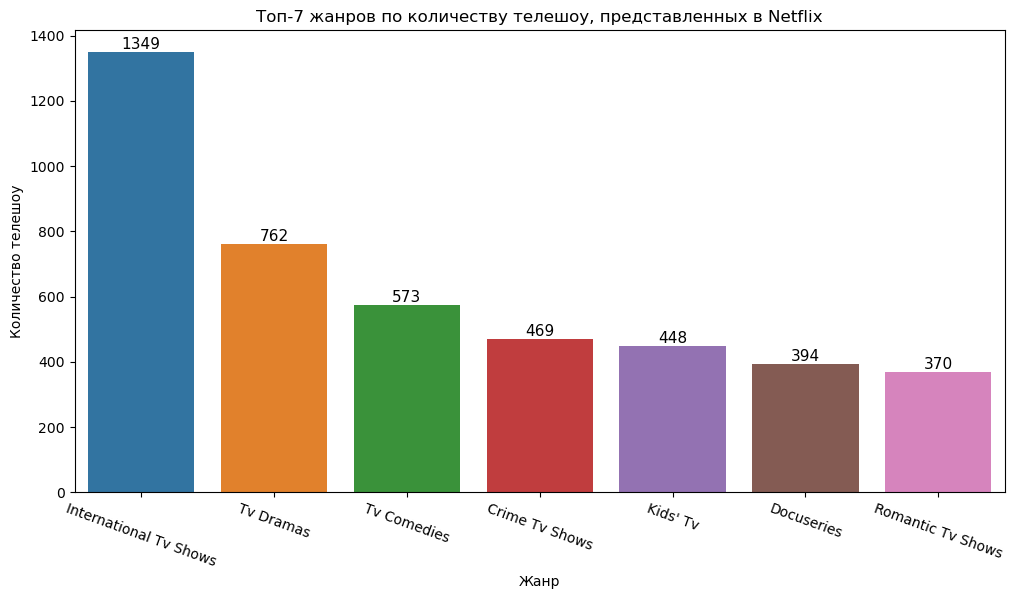

In [6]:
top(data[data['type']=='TV Show'], 'listed_in' , 7)

Наибольшее количество телешоу, размещенных в стимминговом сервисе, представлены в жанрах:
* International TV Shows - 1349 шоу, 
* TV Dramas - 762 шоу,
* TV Comedies - 573 шоу,
* Crime TV Shows - 469 шоу,
* Kids' TV - 448 шоу,
* Docuseries - 394 шоу,
* Romantic TV Shows - 370 шоу.


Также визуализируем топ-5 актеров по количеству фильмов, в которых они сыграли.

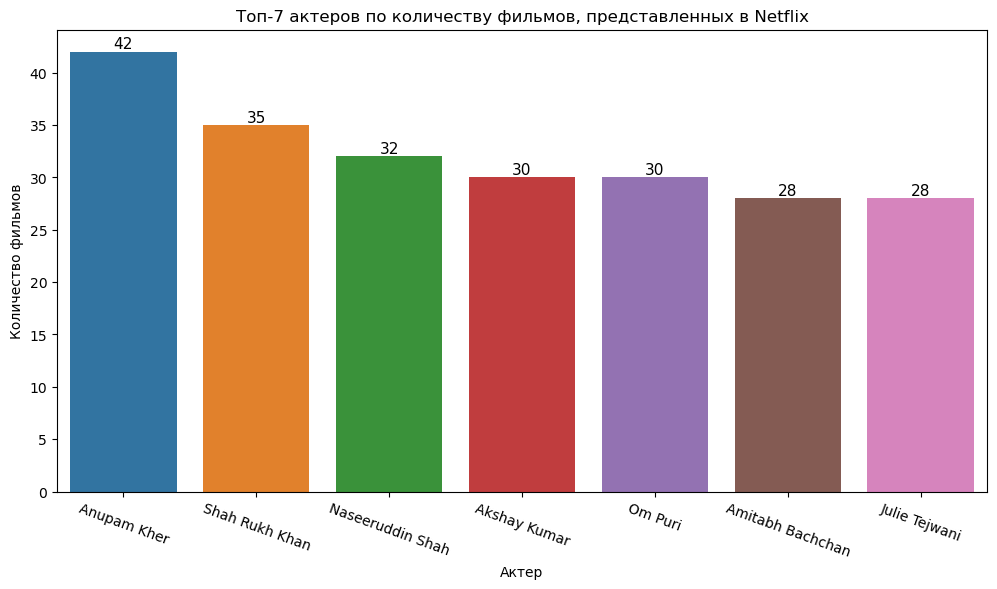

In [7]:
top(data[data['type']!='TV Show'],'cast', 7)

В топ-7 актеров по количеству фильмов входят:
* Anupam Kher - 42 фильма, 
* Shah Rukh Khan - 35 фильмов, 
* Naseeruddin Shah - 32 фильма, ,
* Akshay Kumar - 30 фильмов,
* Om Puri- 30 фильмов, 
* Amitabh Bachchan - 28 фильмов,  
* Julie Tejwani - 28 фильмов. 

**Вывод:** Объявленная функция дает возможность проанализировать количество уникальных значений в столбцах с множественными значениями.